# Desafio - IGTI - Modulo 03 - MNIST
- Autor: Rodrigo de Lima Oliveira
- Data : 18/06/2020
- LinkedIn: https://www.linkedin.com/in/rodrigolima82/

## Descrição do Problema

**A base de dados MNIST**

Um dos mais clássicos conjuntos de dados para o treinamento e benchmark de algoritmos de classificação é o MNIST. Ele é composto por 70.000 imagens (60 mil de treino, 10 mil de teste) de números de 0 a 9 escritos à mão, já previamente classificados. Os números são sempre apresentados individualmente.

![title](image.png)

Suponha que você trabalha em uma empresa que faz a leitura automática (OCR) de formulários e cheques para instituições financeiras, e que a você foi atribuído o trabalho de desenvolver um programa que faça a leitura de números escritos à mão nesses documentos. Um tratamento prévio das imagens já entrega a você os números individualmente em imagens de resolução similar.

Cabe a você usar o aprendizado de máquina para ler cada imagem e dizer, com margem de segurança alta, qual número foi escrito ali. Por falta de dados de teste, você usará o MNIST para treinar o seu algoritmo. Se seu algoritmo não tiver resultados excelentes, os números serão enviados para leitura e digitação manual, feita por operadores humanos, uma operação cara e pouco escalável.

**Referências:**

MNIST: http://yann.lecun.com/exdb/mnist/ (acesso em 09/06/2020)

Imagem: http://blog.welcomege.com/mnist-database/ (acesso em 29/04/2018)

## Carregando as bibliotecas

In [1]:
# Imports de avisos
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulacao de dados
import pandas as pd
import numpy as np

# Import para visualizacao dos dados
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Imports de bibliotecas para treinamento de redes neurais convolucionais
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Input, Dense, Activation, Dropout
from keras.callbacks import EarlyStopping


Using TensorFlow backend.


In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Desafio - Modulo 03 - Rodrigo" --iversions

platform   1.0.8
matplotlib 3.2.1
numpy      1.18.2
pandas     0.25.3
py4j       0.10.7
Desafio - Modulo 03 - Rodrigo


## Carregar os dados

In [3]:
# Carregando o dataset de treinamento com imagens do MNIST
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


## Criação e Validação dos Modelos de Machine Learning

### Convolutional Neural Network

In [4]:
# Preparando os dados para treinamento do baseline

X = train.drop(labels = ['label'], axis = 1) #other than labels (including pixels only) 

# Transformando o dataframe para formato numpy (é necessário para aplicar CNN)
X = X.to_numpy()

# Normalizacao dos valores no intervalo de [0,1]
X = X/255

# Redimensionamento da imagem para o formato 28x28
# Transformar de (42000,784) pra (42000, 28, 28, 1)
X = X.reshape(X.shape[0], 28, 28, 1)

# Exibindo o shape
print(X.shape)

(42000, 28, 28, 1)


In [6]:
# Definindo a variavel target
y = train['label']

# Transformando em formato categorico do keras (com 10 classes, com numeros de de 0 a 9)
y = to_categorical(y.values, num_classes=10)

# Exibindo o shape
print(y.shape)

(42000, 10)


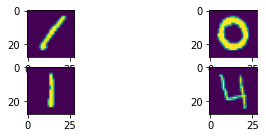

In [20]:
# Exibindo algumas imagens como exemplo
for i in range(4):
    plt.subplot(420 + 1 + i)
    plt.imshow(X[i][:,:,0])

## Realizando o treinamento do modelo

In [23]:
# Criando a estrutura da rede neural convolucional
cnn = Sequential()
cnn.add(Conv2D(filters=20, kernel_size=(2, 2), activation='relu', input_shape=(28,28,1)))
cnn.add(MaxPool2D())
cnn.add(Conv2D(filters=20, kernel_size=(2, 2), activation='relu'))
cnn.add(MaxPool2D())
cnn.add(Flatten())
cnn.add(Dense(units = 120, activation = 'relu'))
cnn.add(Dense(units = 10, activation = 'softmax'))

# Instanciando a funcao de perda e a metrica de desempenho
cnn.compile('adam', 'categorical_crossentropy', metrics = ['acc'])

# Definindo a parada mais cedo para evitar overfitting
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)

# Exibindo o resumo
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 27, 27, 20)        100       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 20)        1620      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 20)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               86520     
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [ ]:
# Realizando o treinamento do modelo CNN
model_cnn = cnn.fit(X, y, validation_split = 0.2, epochs = 500, callbacks = [es])

In [ ]:
# Exibindo desempenho do modelo
plt.plot(model.history['acc'], label='train')
plt.plot(model.history['val_acc'], label='val')
plt.legend()
plt.show()